# This is the code I will be building for my thesis project that I am writing at the chair of Public Economics of Prof. Daniel Schunk
# with Dr. Katharina Hartinger as my adviser.

I will be documenting everything using these markdown cells to describe ideas, processes and problems that arise while writing the code. 

All the packages that will be imported to run the code for my thesis will be readable in the cell below.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [4]:
df = pd.read_csv("Game_data_25_04_24.csv")  

# Create the 'Success' column
df['Success'] = game_data.apply(lambda row: 1 if row['Guess'] == row['Mystery Word'] else 0, axis=1)

# Display the first few rows to verify the new column
df.head()

,Table Number,Move,Clues,Mystery Word,Guess,Mode,Speed,Language,End,Success
0,312175859,1609,"Koperta, Naklejony, Pocztowy, Pocztówka",Stamp,Znaczek,NaN,NaN,NaN,NaN,0
1,312175859,1615,"W, Rimmikub, Glazura, Kwadracik",Tile,Płytka,NaN,NaN,NaN,NaN,0
2,312175859,1626,"Grajek, Baśń, Ta, Tuj",Rat,Bard,NaN,NaN,NaN,NaN,0
3,312175859,1632,"Płacony, Restauracja, Kid, Western",Bill,Tip,NaN,NaN,NaN,NaN,0
4,312175859,1638,"Władzy, Złoty, Tytanowy, Obrączka",Ring,Ring,NaN,NaN,NaN,NaN,1


The dataset seems to treat every character in the column 'Clues' as a unique clue, meaning that there would be about 160 clues on average. 
This is why the function below splits the clues by every comma, then treating each word as a clue as intended.

The function below takes all the clues the players give and plots the success rate of the guesser.

In [ ]:
def analyze_clue_success_rate_plot(data):
    # Filter relevant moves where the guesser made a guess
    guesser_moves = data[data['Guess'].notnull()]

    # Split the clues by the delimiter (assuming commas) and count the number of clues
    guesser_moves['Num_Clues'] = guesser_moves['Clues'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
    
    # Calculate success rate for different numbers of clues given before the guess
    success_rate = []
    max_num_clues = guesser_moves['Num_Clues'].max()
    for i in range(1, max_num_clues + 1):
        # Filter moves with exactly i clues given before the guess
        moves_with_i_clues = guesser_moves[guesser_moves['Num_Clues'] == i]
        
        # Calculate success rate for moves with exactly i clues given before the guess
        total_moves = len(moves_with_i_clues)
        successful_moves = len(moves_with_i_clues[moves_with_i_clues['Guess'] == moves_with_i_clues['Mystery Word']])
        success_rate.append(successful_moves / total_moves if total_moves > 0 else 0)
    
    # Visualize the success rate over the number of clues given before the guess
    plt.bar(range(1, max_num_clues + 1), success_rate)
    plt.xlabel('Number of Clues Before Guess')
    plt.ylabel('Success Rate')
    plt.title('Success Rate vs. Number of Clues Before Guess')
    plt.xticks(range(1, max_num_clues + 1, max(1, max_num_clues // 10)))
    plt.grid(axis='y')
    plt.show()

# Example usage:
# df = pd.read_csv('your_file.csv')
# analyze_clue_success_rate_plot(df)

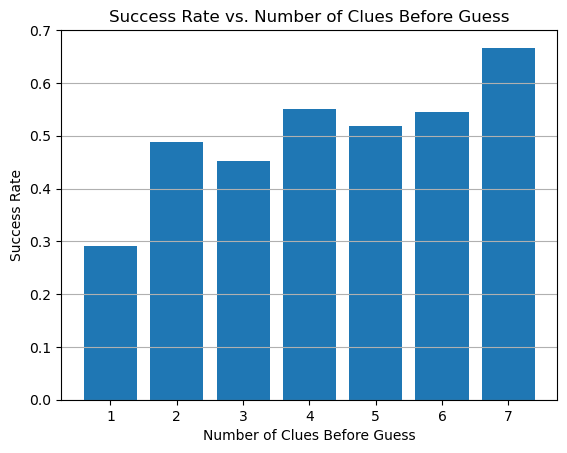

In [31]:
#analyze_clue_success_rate_plot(df)

In [8]:
def calculate_average_clues(data):
    # Filter relevant moves where the guesser made a guess
    guesser_moves = data[data['Guess'].notnull()]
    
    guesser_moves['Num_Clues'] = guesser_moves['Clues'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
    # Calculate and print the average number of clues
    average_clues = guesser_moves['Num_Clues'].mean()
    print("Average number of clues:", average_clues)

In [24]:
# Example usage:

# Get basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

print(df.head())
print(df.columns)


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16589 entries, 0 to 16588
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Table Number  16589 non-null  int64 
 1   Move          16589 non-null  int64 
 2   Clues         16589 non-null  object
 3   Mystery Word  16589 non-null  object
 4   Guess         16589 non-null  object
 5   Mode          8216 non-null   object
 6   Speed         8216 non-null   object
 7   Language      8216 non-null   object
 8   End           8216 non-null   object
dtypes: int64(2), object(7)
memory usage: 1.1+ MB
None
   Table Number  Move                                    Clues Mystery Word  \
0     312175859  1609  Koperta, Naklejony, Pocztowy, Pocztówka        Stamp   
1     312175859  1615          W, Rimmikub, Glazura, Kwadracik         Tile   
2     312175859  1626                    Grajek, Baśń, Ta, Tuj          Rat   
3     312175859  1632

Here I will be attempting to run a first regression to try and find predictory variables for the dataset

In [11]:
def clues_as_words(data):
    # Filter relevant moves where the guesser made a guess
    guesser_moves = data[data['Guess'].notnull()]
    
    # Split the clues by the delimiter (assuming commas) and count the number of clues
    guesser_moves['Num_Clues'] = guesser_moves['Clues'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
    return guesser_moves

In [12]:
df['Success'] = np.where(df['Guess'] == df['Mystery Word'], 1, 0)

df = clues_as_words(df)

# Example of adding additional explanatory variables
# For instance, the average length of the clues
df['Avg_Clue_Length'] = df['Clues'].apply(lambda x: np.mean([len(word) for word in x.split(',')]) if pd.notnull(x) else 0)

# Another example could be the number of unique clues
df['Num_Unique_Clues'] = df['Clues'].apply(lambda x: len(set(x.split(','))) if pd.notnull(x) else 0)

# Select the relevant columns for regression
df_for_regression = df[['Success', 'Num_Clues', 'Avg_Clue_Length', 'Num_Unique_Clues']]

# Drop any rows with missing values
df_for_regression.dropna(inplace=True)

C:\Users\domin\AppData\Local\Temp\ipykernel_21144\2531165714.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_regression.dropna(inplace=True)


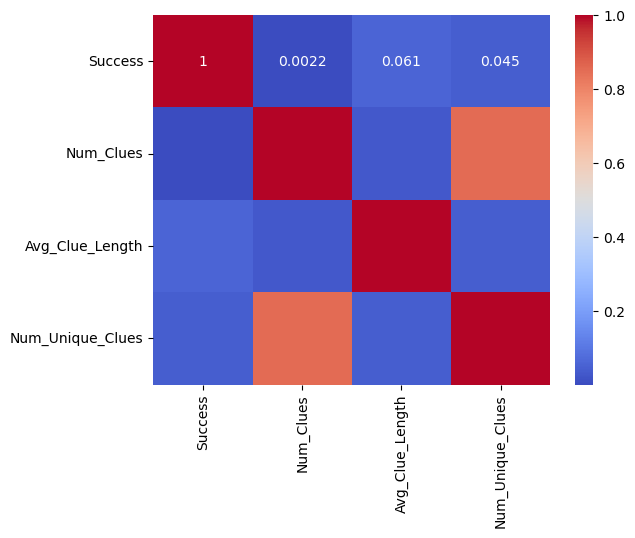

c:\Users\domin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\domin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\domin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


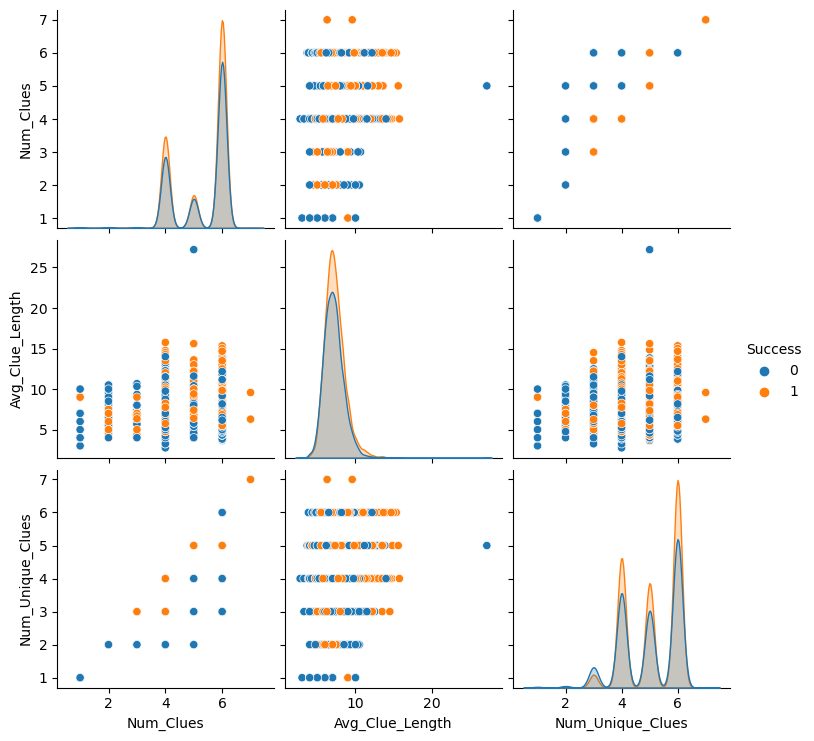

In [13]:
# Plot the correlation matrix
sns.heatmap(df_for_regression.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df_for_regression, hue='Success')
plt.show()

In [21]:
# Define the dependent variable and independent variables
X = df_for_regression[['Num_Clues', 'Avg_Clue_Length', 'Num_Unique_Clues']]
y = df_for_regression['Success']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.684269
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                16589
Model:                          Logit   Df Residuals:                    16585
Method:                           MLE   Df Model:                            3
Date:                Sun, 19 May 2024   Pseudo R-squ.:                0.007474
Time:                        16:53:31   Log-Likelihood:                -11351.
converged:                       True   LL-Null:                       -11437.
Covariance Type:            nonrobust   LLR p-value:                 7.863e-37
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5503      0.125     -4.411      0.000      -0.795      -0.306
Num_Clues  

Number of Clues negatively impacting, but number of unique clues impacts it positively. Multicollinearity, how to counteract?

**Linear Regression**

In [15]:
# Define the dependent variable and independent variables
X = df_for_regression[['Num_Clues', 'Avg_Clue_Length', 'Num_Unique_Clues']]
y = df_for_regression['Success']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model using statsmodels
linear_model = sm.OLS(y, X).fit()

# Print the model summary
print(linear_model.summary())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the linear regression model using scikit-learn
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict on the test set
y_pred = linreg.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:                Success   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     57.35
Date:                Wed, 29 May 2024   Prob (F-statistic):           7.09e-37
Time:                        14:13:02   Log-Likelihood:                -11893.
No. Observations:               16589   AIC:                         2.379e+04
Df Residuals:                   16585   BIC:                         2.382e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.3667      0.031  

The code below doesn't work because the columns aren't numerical. I would have to change the dataframe and I will do that at a later point.

In [10]:
# Create a dummy variable for missing 'Mode' values
df['Mode_Missing'] = df['Mode'].isna().astype(int)

# Convert 'Mode' and 'Language' to dummy variables, keeping NaN as is
df_with_dummies = pd.get_dummies(df, columns=['Mode', 'Language'], drop_first=True)

# Ensure all columns are numeric
df_with_dummies = df_with_dummies.apply(pd.to_numeric, errors='coerce')

# Calculate number of unique clues
df_with_dummies['Num_Clues'] = df['Clues'].apply(lambda x: len(x.split(',')) if pd.notna(x) else 0)

# Detect the language of the guess and the mystery word, and compare
def detect_language(row):
    try:
        guess_language = detect(row['Guess']) if pd.notna(row['Guess']) else 'unknown'
        mystery_word_language = detect(row['Mystery Word']) if pd.notna(row['Mystery Word']) else 'unknown'
        return 1 if guess_language == mystery_word_language else 0
    except:
        return 0

df_with_dummies['Language_Match'] = df.apply(detect_language, axis=1)

# Define the dependent variable and independent variables
X = df_with_dummies[['Num_Clues', 'Speed', 'Language_Match', 'Mode_Missing'] + [col for col in df_with_dummies.columns if 'Mode_' in col or 'Language_' in col]]
y = df_with_dummies['Success']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model using scikit-learn
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

Logistic Regression using Success as the dependent variable and Num_Clues, Clue_Length and Num_Unique_Clues as independent variables

In [18]:
df['Success'] = np.where(df['Guess'] == df['Mystery Word'], 1, 0)

# Function to calculate VIF
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Prepare the regression dataframe
df = df[df['Guess'].notnull()]
df['Num_Clues'] = df['Clues'].apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)
df['Avg_Clue_Length'] = df['Clues'].apply(lambda x: np.mean([len(word) for word in x.split(',')]) if pd.notnull(x) else 0)
df['Num_Unique_Clues'] = df['Clues'].apply(lambda x: len(set(x.split(','))) if pd.notnull(x) else 0)
df_for_regression = df[['Success', 'Num_Clues', 'Avg_Clue_Length', 'Num_Unique_Clues']]
df_for_regression.dropna(inplace=True)

# Define the independent variables and dependent variable
X = df_for_regression[['Num_Clues', 'Avg_Clue_Length', 'Num_Unique_Clues']]
X = sm.add_constant(X)
y = df_for_regression['Success']

# Calculate VIF
vif = calculate_vif(X)
print(vif)

# Check for high VIF values and address multicollinearity if needed
# If VIF > 5 or 10, consider removing or combining variables
# Here, proceed with logistic regression assuming no high VIF issues

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(y, X).fit()

# Print the model summary
print(logit_model.summary())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the logistic regression model using scikit-learn
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

           Variable        VIF
0             const  62.855373
1         Num_Clues   3.672963
2   Avg_Clue_Length   1.001744
3  Num_Unique_Clues   3.675221
Optimization terminated successfully.
         Current function value: 0.684269
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                Success   No. Observations:                16589
Model:                          Logit   Df Residuals:                    16585
Method:                           MLE   Df Model:                            3
Date:                Wed, 29 May 2024   Pseudo R-squ.:                0.007474
Time:                        14:25:26   Log-Likelihood:                -11351.
converged:                       True   LL-Null:                       -11437.
Covariance Type:            nonrobust   LLR p-value:                 7.863e-37
                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

C:\Users\domin\AppData\Local\Temp\ipykernel_21144\1658611837.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_regression.dropna(inplace=True)
